**Inferences for Two Population Standard Deviations**

In this section we discuss hypothesis tests for two two population standard deviations. Or in otherwords we discuss methods of inference for the standard deviations of one variable from two different populations. These methods are based on the **$F$-distribution**.

The $F$-distribution is a right-skewed probability density distribution with two shape parameters $\nu_1$ and $\nu_2$, called the degrees of freedom for the numerator ($\nu_1$) and the degrees of freedom for the denominator $(\nu_2)$.

$$df = (\nu_1,\nu_2)$$

As for any other density curve the area under the curve of the $F$-distribution corresponds to probabilites. The area under the curve, and thus, the probability, for any given interval and given $df$ is computed with software. 

In order to perform a hypothesis test for two population standard deviations, the value that corresponds to a specified area under a $F$-curve is calculated.

Given $\alpha$, where $\alpha$ corresponds to a probability between $0$ and $1$, $F_{\alpha}$ denotes the value having an area $\alpha$ to its right under a $F$-curve.

![F_curve_alpha](F_curve_alpha.png)

In the figure above $F_{0.05}$ for $df=(9,14)$ evaluates to $\approx 2.6458$.

One interesting property of $F$-curves is the **reciprocal property.**. It says that for a $F$-curve with $df=(\nu_1,\nu_2)$, the $F$-value having the area $\alpha$ to its left equal the reciprocal of the $F$-value having the area $\alpha$ to its right for an $F$-curve with $df(\nu_2,\nu_1)$. Adopted to the example above, where $F_{0.05}$ for $df=(9,14)$ evaluates to $\approx 2.6458$, this means that $F_{0.95}$ for $df=(14,9)$ evaluates to $\frac{1}{2.6458} = 0.378$.

![F_curve_reciprocal_alpha](F_curve_reciprocal_alpha.png)

**Interval Estimation of $\sigma_1 - \sigma_2$**

The $100(1-\alpha)$% confidence interval for $\sigma$ is 

$$\frac{1}{\sqrt{F_{\alpha /2}}} \times \frac{s_1}{s_2} \le \sigma \le \frac{1}{\sqrt{F_{1-\alpha /2}}} \times \frac{s_1}{s_2}\text{,}$$

where $s_1$ and $s_2$ are the sample standard deviations.

**Two Standard Deviations $F$-test**

The hypothesis-testing procedure is called **two standard deviations $F$-test.** Hypothesis testing for two population standard deviations follows the same step-wise procedure as for other hypothesis tests.

\begin{array}{l}
\hline
\ \text{Step 1}  & \text{State the null hypothesis } H_0 \text{ and alternative hypothesis } H_A \text{.}\\
\ \text{Step 2}  & \text{Decide on the significance level, } \alpha\text{.} \\
\ \text{Step 3}  & \text{Compute the value of the test statistic.} \\
\ \text{Step 4} &\text{Determine the p-value.} \\
\ \text{Step 5} & \text{If } p \le \alpha \text{, reject }H_0 \text{; otherwise, do not reject } H_0 \text{.} \\
\ \text{Step 6} &\text{Interpret the result of the hypothesis test.} \\
\hline 
\end{array}

The test statistic for a hypothesis test for a normally distributed variable and for independent samples of sizes $n_1$ and $n_2$ is given by

$$F = \frac{s_1^2/\sigma_1^2}{s_2^2/\sigma_2^2}\text{,}$$

with $df= (n_1-1, n_2-1)$.

If $H_0: \sigma_1 = \sigma_2$ is true, then the equation simplifies to 

$$F = \frac{s_1^2}{s_2^2}$$

**Two-Standard-Deviations $F$-test: An example**

In order to get some hands-on experience we apply the two standard deviations $F$-test in an exercise. Therefore we load the *students* data set.

In [1]:
import pandas as pd

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In order to showcase the **two standard deviations $F$-test** we examine once again the *height* variable in the *students* data set. We compare the spread of the height of female students and the spread of the height of male students. **We want to test, if the standard deviation of the height of female students ($\sigma_1$) is different from the standard deviation of the height of female students ($\sigma_2$).**

**Data Preparation**

We start with data preparation

- We subset the data set based on the variable *gender*
- Then we sample $25$ female students and $25$ male students
- Then we calculate the standard deviations of the variable of interest (height in cm) for both samples and assign them the variables *s_female* and *s_male*.

In [2]:
female = students_df[students_df['gender']=='Female']
male = students_df[students_df['gender']=='Male']

In [7]:
import numpy as np

n = 25

female_sample = np.random.choice(female['height'],n)
male_sample = np.random.choice(male['height'],n)

In [8]:
sd_female = np.std(female_sample,ddof=1)
sd_male = np.std(male_sample,ddof=1)

print(sd_female,sd_male)

8.123422923866515 9.367496997597597


Further, we check the normality assumption by plotting a **Q-Q plot**.

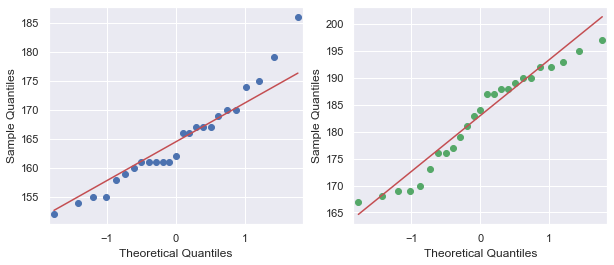

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,4)})

fig, axs = plt.subplots(ncols=2)

sm.qqplot(female_sample, ax = axs[0], line='q')
sm.qqplot(male_sample,ax=axs[1], line='q', color='g')

pass

The data of both samples falls roughly on a straight line. Based on the graphical evaluation approach we conclude that the data is normally distributed.

**Hypothesis testing**

In order to conduct the **two standard deviations $F$-test** we follow the step-wise implementation procedure for hypothesis testing.

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The null hypothesis states that the standard deviation of the height of female students ($\sigma_1$) equals the standard deviation of the height of male students($\sigma_2$).

$$H_0: \sigma_1= \sigma_2$$

**Alternative hypothesis**
$$H_A: \sigma_1 \neq \sigma_2$$

This formulation results in a two-sided hypothesis test.

**Step 2: Decide on the significance level, \alpha**

$$α=0.05$$

In [10]:
alpha = 0.05

For illustration purposes we manually compute the test statistic in Python. Recall the equation for the test statistic from above:

$$F = \frac{s_1^2}{s_2^2}$$

In [11]:
# Compute the value of the test-statist

Ftest = (sd_female**2)/(sd_male**2)

Ftest

0.7520227920227922

In [14]:
# compute df

df1 = len(female_sample)-1
df2 = len(male_sample)-1

# compute the p-value

from scipy.stats import f

p_upper = 1-f.cdf(Ftest,dfn=df1,dfd=df2)
p_lower = f.cdf(Ftest,dfn=df1,dfd=df2)

print(p_upper,p_lower)

if p_upper*2 > 1:
    p = p_lower*2
else:
    p = p_upper*2

p

0.7548065789570393 0.2451934210429607


0.4903868420859214

**Step $5$: If $p \leq \alpha$, reject $H_0$; otherwise, do not reject $H_0$.**

The $p$-value is greater than the specified significance level of $0.05$; we do not reject $H_0$. The test results are statistically significant at the $5$% level and provide not sufficient evidence against the null hypothesis.

**Step $6$: Interpret the result of the hypothesis test.**

$p = 0.4903868420859214$. At the $5$% significance level, the data does not provide sufficient evidence to conclude that the standard deviations of the height of female and male students is different.

